In [1]:
import pandas as pd

# Load dataset files
print("Loading raw datasets...")

# Introduce the *paths* of the raw datasets

# Depression
data_depression = pd.DataFrame(pd.read_json("../backups/subr_author_posts.jsonl", lines=True))
data_depression["depression_related"] = [1] * len(data_depression.index)  # Dep. identifier: true
dep_size = len(data_depression.index)

# Non-depression
data_control = pd.DataFrame(pd.read_json("../backups/ref_author_posts.jsonl", lines=True))
data_control["depression_related"] = [0] * len(data_control.index)  # Dep. identifier: false
non_dep_size = len(data_control.index)

print("Raw datasets succesfully loaded")

Loading raw datasets...
Raw datasets succesfully loaded


In [15]:
%matplotlib inline

def annotate_barh_chart(ax, x_name, y_name):
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.invert_yaxis()
    for p in ax.patches:
        # the number (text), point to annotate, point to place the text, coord system and alignments
        ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()),
                    xytext=(-2, -20), textcoords="offset points", horizontalalignment="right", verticalalignment="bottom")

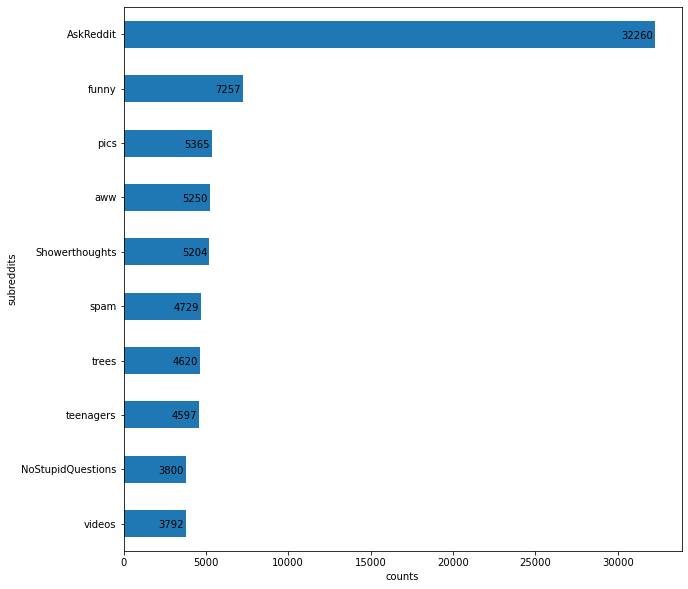

In [16]:
dep_subreddits = data_depression["subreddit"].value_counts(sort=True)
axes = dep_subreddits[:10].plot(kind="barh", figsize=(10, 10), x="subreddit")
annotate_barh_chart(axes, "counts", "subreddits")


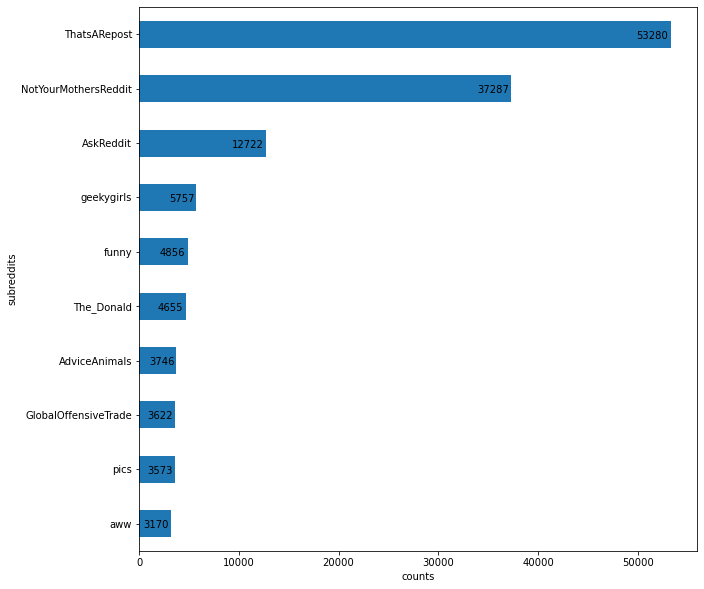

In [4]:
ctrl_subreddits = data_control["subreddit"].value_counts(sort=True)
axes = ctrl_subreddits[:10].plot(kind="barh", figsize=(10, 10), x="subreddit")
annotate_barh_chart(axes, "counts", "subreddits")


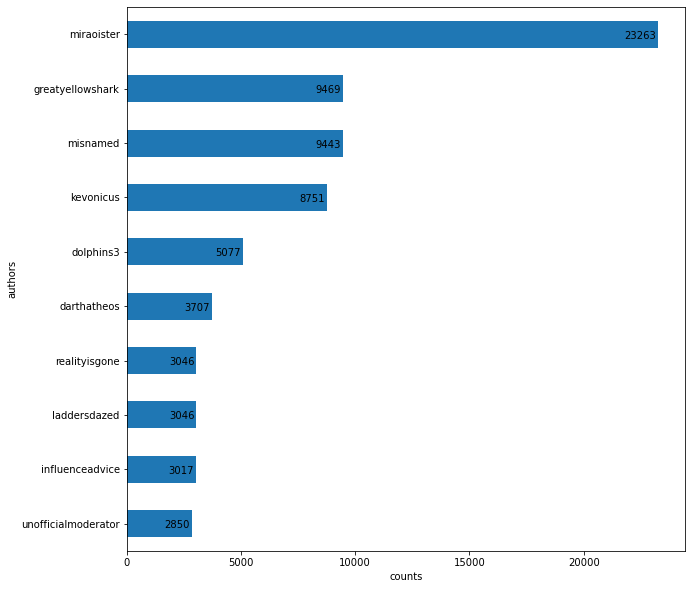

In [5]:
dep_authors = data_depression["author"].value_counts(sort=True)
axes = dep_authors[:10].plot(kind="barh", figsize=(10, 10), x="author")
annotate_barh_chart(axes, "counts", "authors")

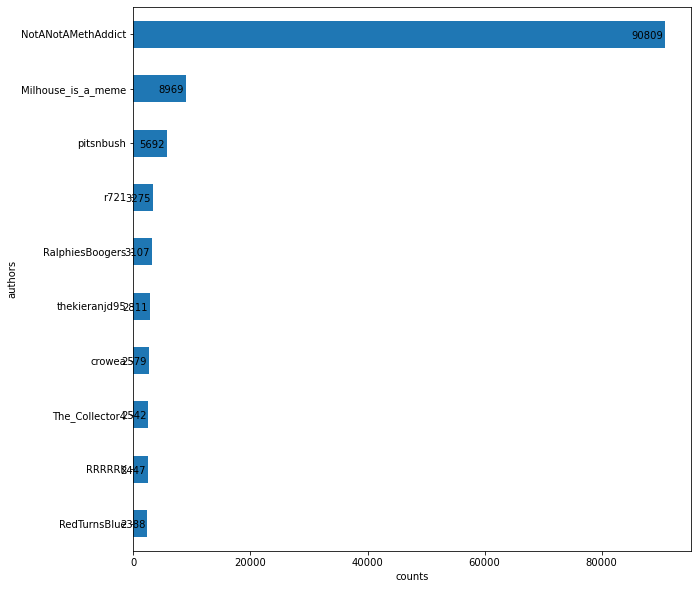

In [6]:
ctrl_authors = data_control["author"].value_counts(sort=True)
axes = ctrl_authors[:10].plot(kind="barh", figsize=(10, 10), x="author")
annotate_barh_chart(axes, "counts", "authors")

In [9]:
data_control.loc[data_control["author"] == "NotANotAMethAddict"]

,id,url,title,author,selftext,created_utc,retrieved_on,subreddit,subreddit_id,subreddit_type,domain,gildings,num_comments,score,over_18,permalink,depression_related
325023,3wxzev,http://airwars.org/civcas-2015/,Reported civilian and ‘friendly fire’ deaths f...,NotANotAMethAddict,,1450190455,1.454931e+09,NotYourMothersReddit,t5_32c70,NaN,airwars.org,NaN,0,1,False,/r/NotYourMothersReddit/comments/3wxzev/report...,0
325027,3wxxe9,http://mobile.philly.com/beta?wss=/philly/news...,"A year later, mother grieves over police shoot...",NotANotAMethAddict,,1450189530,1.454931e+09,NotYourMothersReddit,t5_32c70,NaN,mobile.philly.com,NaN,0,1,False,/r/NotYourMothersReddit/comments/3wxxe9/a_year...,0
325032,3wxusi,http://imgur.com/r/funny/hgC95sr,The brawl in the Ukrainian Parliament looks re...,NotANotAMethAddict,,1450188338,1.454931e+09,ThatsARepost,t5_31s7k,NaN,imgur.com,NaN,0,1,False,/r/ThatsARepost/comments/3wxusi/the_brawl_in_t...,0
325033,3wxuro,http://imgur.com/r/funny/UrBXaL9,Found in my dorm's study room during final's week,NotANotAMethAddict,,1450188331,1.454931e+09,ThatsARepost,t5_31s7k,NaN,imgur.com,NaN,0,1,False,/r/ThatsARepost/comments/3wxuro/found_in_my_do...,0
325038,3wxrxh,http://www.stripes.com/news/middle-east/this-s...,This strange story about an ISIS plan to use b...,NotANotAMethAddict,,1450186943,1.454931e+09,NotYourMothersReddit,t5_32c70,NaN,stripes.com,NaN,0,1,False,/r/NotYourMothersReddit/comments/3wxrxh/this_s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515961,1jon9m,http://hugewasteofmoney.com/product/girlfriend...,Girlfriend Pillow,NotANotAMethAddict,,1375632025,1.411972e+09,FreeKarma,t5_2qt9w,NaN,hugewasteofmoney.com,NaN,0,44,False,/r/FreeKarma/comments/1jon9m/girlfriend_pillow/,0
515962,1jon84,http://www.almostseenon.com/pcp-parks-and-recr...,PCP Makes it Fun - Parks and Recreation,NotANotAMethAddict,,1375631979,1.411972e+09,FreeKarma,t5_2qt9w,NaN,almostseenon.com,NaN,0,39,False,/r/FreeKarma/comments/1jon84/pcp_makes_it_fun_...,0
516107,1jkemg,http://hugewasteofmoney.com/product/star-wars-...,Star Wars R2-D2 Trash,NotANotAMethAddict,,1375455069,1.411978e+09,FreeKarma,t5_2qt9w,NaN,hugewasteofmoney.com,NaN,0,60,False,/r/FreeKarma/comments/1jkemg/star_wars_r2d2_tr...,0
516210,1jhl6o,http://31.media.tumblr.com/a6ce25788f3760e85b2...,decision making...,NotANotAMethAddict,,1375357970,1.411982e+09,funny,t5_2qh33,NaN,31.media.tumblr.com,NaN,2,15,False,/r/funny/comments/1jhl6o/decision_making/,0
